In [125]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [126]:
filepath = "/content/sample_data/risk ofemphysema.csv"
df= pd.read_csv(filepath)


In [127]:
df.head(5)

,Risk,Age,Blood Pressure,Smoker
0,27,57,152,No
1,59,89,96,Yes
2,36,65,162,No
3,27,77,99,No
4,56,82,119,Yes


In [128]:
df = df.rename(columns={'Blood Pressure': 'Blood_Pressure'})

In [129]:
df.head(3)

,Risk,Age,Blood_Pressure,Smoker
0,27,57,152,No
1,59,89,96,Yes
2,36,65,162,No


In [130]:
df["Smoker"] = df["Smoker"].map({"Yes":1,"No":0})
df.head(3)

,Risk,Age,Blood_Pressure,Smoker
0,27,57,152,0
1,59,89,96,1
2,36,65,162,0


In [131]:
x= df[["Age","Blood_Pressure", "Smoker"]] #independent variables
y =df["Risk"] # Target varible

In [132]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y, test_size=0.2)

print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(196, 3)
(50, 3)
(196,)
(50,)


In [133]:
model = LinearRegression()
model.fit(X_Train, Y_Train)

LinearRegression()

In [134]:
Risk_prediction = model.predict(X_Test)

B0 = model.intercept_
B1 = model.coef_[0]
B2 = model.coef_[1]
B3 = model.coef_[2]

print(B0,B1,B2,B3)
Y = B0 + B1*x["Age"] + B2*x["Blood_Pressure"] + B3*x["Smoker"]
print( "Y" "=", "x1 +" ,B2  , "x2 +", B3 ,"x2 +" ,B0  )


-76.03672576556903 1.1437183854703754 0.25402372846089505 8.12820576577931
Y= x1 + 0.25402372846089505 x2 + 8.12820576577931 x2 + -76.03672576556903


The regression coefficients from your linear model represent the following:

B0 (Intercept) : (-76.59) This is the estimated 'Risk' when 'Age', 'Blood Pressure', and 'Smoker' status are all zero. In practical terms, an age or blood pressure of zero is not realistic, so the intercept primarily serves to adjust the regression lines position.

B1 (Coefficient for Age): (1.15) For every one-year increase in 'Age', the 'Risk' is estimated to increase by 1.15 units, assuming 'Blood_Pressure' and 'Smoker' status remain constant.

B2 (Coefficient for Blood_Pressure): (0.25) For every one-unit increase in 'Blood_Pressure', the 'Risk' is estimated to increase by 0.25 units, assuming 'Age' and 'Smoker' status remain constant.

B3 (Coefficient for Smoker): (8.38) This is the estimated difference in 'Risk' between a smoker (Smoker=1) and a non-smoker (Smoker=0). Specifically, being a smoker is associated with an increase of 8.38 units in 'Risk', assuming 'Age' and 'Blood_Pressure' are held constant.

These interpretations are based on the linear model: Risk = B0 + B1 * Age + B2 * Blood_Pressure + B3 * Smoker  .

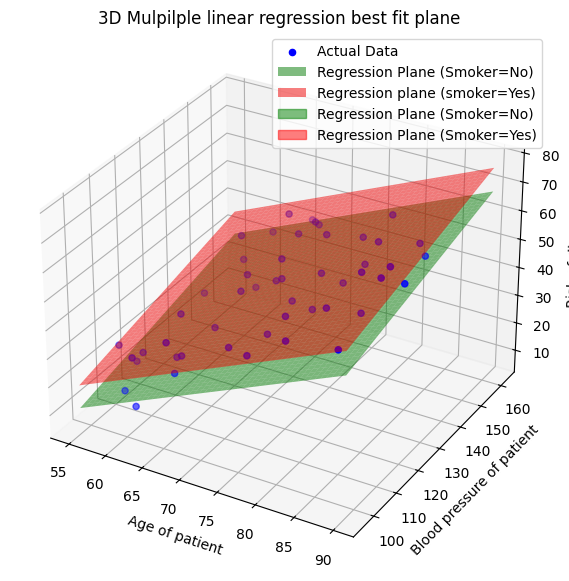

In [135]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(X_Test["Age"], X_Test["Blood_Pressure"],Y_Test, color= 'blue', label = 'Actual Data')

range_x1 = np.linspace(X_Test["Age"].min(), X_Test["Age"].max(),100)
range_x2 = np.linspace(X_Test["Blood_Pressure"].min(), X_Test["Blood_Pressure"].max(),100)
x1, x2, = np.meshgrid(range_x1, range_x2)

z= B0 + B1 * x1 + B2 * x2 + B3* 0

ax.plot_surface(x1, x2, z, alpha=0.5, color='green', label='Regression Plane (Smoker=No)')

z1 =B0 + B1*x1 + B2*x2 + B3 *1

ax.plot_surface(x1,x2, z1, alpha = 0.5, color = 'red', label = 'Regression plane (smoker=Yes)')

# Create custom legend handles for the surface plots
surface_patch_smoker0 = Patch(color='green', alpha=0.5, label='Regression Plane (Smoker=No)')
surface_patch_smoker1 = Patch(color='red', alpha=0.5, label='Regression Plane (Smoker=Yes)')

# Get existing handles and labels from scatter plot and add custom patches
handles, labels = ax.get_legend_handles_labels()
handles.extend([surface_patch_smoker0, surface_patch_smoker1])
ax.legend(handles=handles, loc='best')



ax.set_xlabel('Age of patient')
ax.set_ylabel('Blood pressure of patient')
ax.set_zlabel('Risk of dieases')
ax.set_title('3D Mulpilple linear regression best fit plane')
plt.show()








In [136]:


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_Test, Risk_prediction)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(Y_Test, Risk_prediction))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Absolute Error (MAE): 5.0586
Root Mean Squared Error (RMSE): 5.9213


In [137]:


# Calculate R-squared
r_squared = r2_score(Y_Test, Risk_prediction)
print(f"R-squared: {r_squared:.4f}")

# Calculate Adjusted R-squared
n = len(Y_Test) # Number of observations
p = X_Test.shape[1] # Number of predictors (independent variables)

if (n - p - 1) > 0: # Ensure denominator is not zero or negative
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    print(f"Adjusted R-squared: {adjusted_r_squared:.4f}")
else:
    print("Cannot calculate Adjusted R-squared: Not enough degrees of freedom (n <= p + 1).")

R-squared: 0.8357
Adjusted R-squared: 0.8250
